<a href="https://colab.research.google.com/github/rebeckakarras/projekt2/blob/main/FA_whitewine_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import read_csv, Series, DataFrame
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pip install factor_analyzer

In [3]:
from factor_analyzer import FactorAnalyzer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



Datahandling of the white wine data.

In [4]:
data_white = pd.read_csv('winequality-white(1).csv', delimiter=";")
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Normalizing the variables.

In [5]:
data_white_dropped = data_white.drop(columns=['quality'])
X = StandardScaler().fit_transform(data_white_dropped)


Representation of the factors in a heatmap

In [6]:
from pandas import read_csv, Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

Here starts the Factor analysis where the module statsmodels.multivariate.factor calculates the eigenvalues, communalities and rotation of the variables from the wine data set.

In [7]:
from statsmodels.multivariate.factor import Factor
mod_w = Factor(data_white_dropped, 3)
res_w = mod_w.fit()
res_w.rotate('quartimax')
communalities = res_w.communality
#With summary the eigenvalues, communality, pre-rotated and qurtimax rotated loadings will be displayed.
res_w.summary()




<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                            Factor analysis results
===============================================================================================================================================
                                            Eigenvalues                                                                                        
-----------------------------------------------------------------------------------------------------------------------------------------------
 fixed acidity volatile acidity citric acid residual sugar chlorides free sulfur dioxide total sulfur dioxide density    pH   sulphates alcohol
-----------------------------------------------------------------------------------------------------------------------------------------------
        3.0364           1.0323      0.7208         0.2831    0.2386              0.1815              -0.0126 -0.0870 -0.1141   -0.1831 -0.3070
-----------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                                               
-----------------------------------------------------------------------------------------------------------------------------------------------
                                            Communality                                                                                        
-----------------------------------------------------------------------------------------------------------------------------------------------
  fixed acidity volatile acidity citric acid residual sugar chlorides free sulfur dioxide total sulfur dioxide density   pH   sulphates alcohol
-----------------------------------------------------------------------------------------------------------------------------------------------
         0.5778           0.0055      0.1467         0.4857    0.0772              0.4894               0.7877  1.4061 0.3126    0.0237  0.4773
-----------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                                               
-----------------------------------------------------------------------------------------------------------------------------------------------
                                         Pre-rotated loadings                                                                                  
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                     factor 0                                                 factor 1                                                 factor 2
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
fixed acidity                                                         -0.2475                                                   0.6522                                                   0.3019
volatile acidity                                                      -0.0112                                                  -0.0198                                                  -0.0703
citric acid                                                           -0.1871                                                   0.2295                                                   0.2429
residual sugar                                                        -0.6829                                              

Three factors can be described as sweetness, sourness and roughness. The black numbers is an inidication of values going at the right direction and has high correlation, whilst the white numbers are going the opposite direction and has less significant correlation

In [8]:
# Here the factord will be displayed.
res_w.get_loadings_frame(threshold=0.5)

,factor 0,factor 1,factor 2
density,-1.183752,0.033908,0.060404
residual sugar,-0.676747,0.049028,0.158978
alcohol,0.654851,-0.052868,-0.213611
chlorides,-0.239426,0.055482,0.129533
fixed acidity,-0.166678,0.741184,-0.025623
pH,0.121210,-0.544364,0.039564
citric acid,-0.092467,0.347148,0.132697
volatile acidity,-0.037221,-0.051985,-0.037120
total sulfur dioxide,-0.414463,0.004384,0.784824
free sulfur dioxide,-0.217450,-0.051173,0.662926


The uniqueness is calculated in order to do the residual matrix. The uniqueness values should be ranging between 0 to 1, which is the almost the case for each value besides density that has a negative uniqueness value indicating a heywood case.

In [9]:
uniqueness = np.diag(1 - communalities)  if communalities.ndim == 2 else (1 - communalities)
uniqueness_df = pd.DataFrame(uniqueness, index=data_white_dropped.columns, columns=['Uniqueness'])
print(uniqueness_df)
lambda_ = res_w.loadings
s = np.corrcoef(np.transpose(data_white_dropped))

sigma = np.matmul(lambda_, lambda_.T) + np.diag(uniqueness)
residuals = s - sigma

                      Uniqueness
fixed acidity           0.422208
volatile acidity        0.994534
citric acid             0.853330
residual sugar          0.514336
chlorides               0.922818
free sulfur dioxide     0.510625
total sulfur dioxide    0.212252
density                -0.406067
pH                      0.687410
sulphates               0.976284
alcohol                 0.522746


The residual matrix show the goodness of fit of the linear regression model. If the residual matrix show that the residual has small and uncorrelated values, is an inidcation of the model being a good fit for the data. Overall the values in the Residual matrix are of small values, hence an indication of a goodness of fit. Even though some of the values are significant larger than the rest has to do with the uniqueness values.

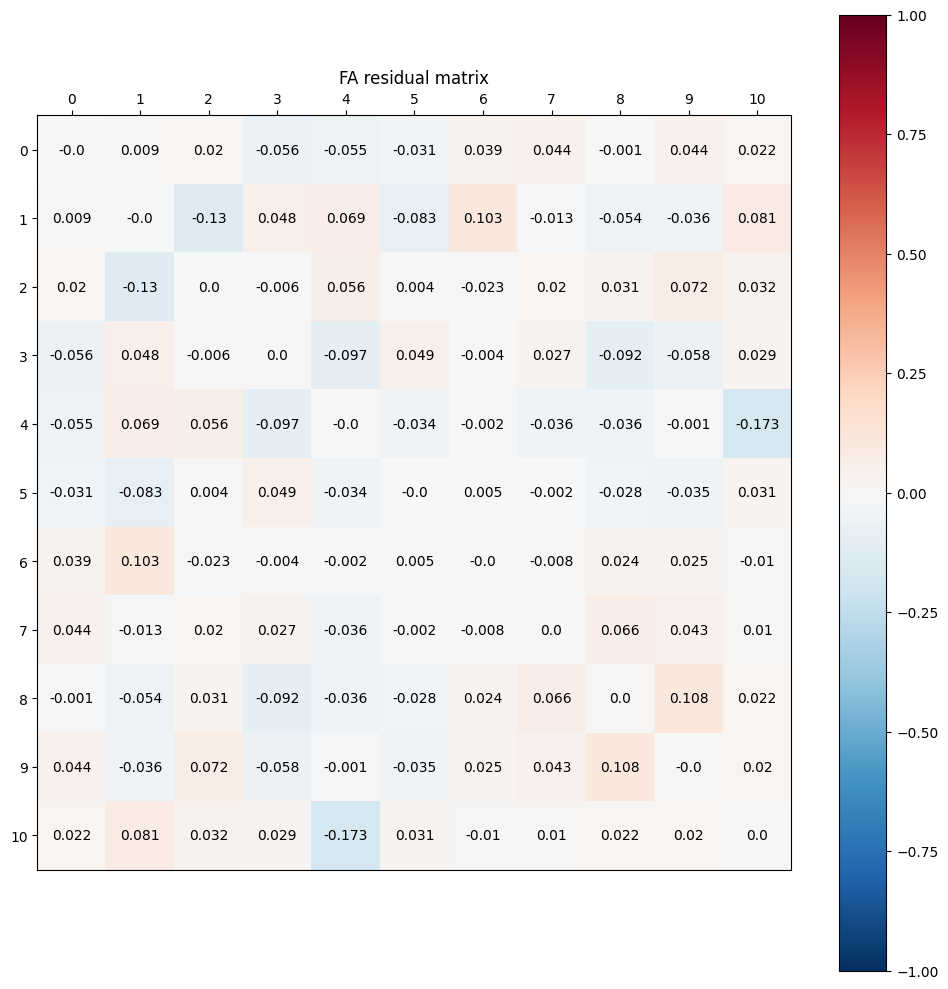

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
im = ax.imshow(residuals, cmap="RdBu_r", vmin=-1, vmax=1)
ax.tick_params(axis="x", bottom=False, labelbottom=False, top=True, labeltop=True)
ax.set_xticks(range(11))
ax.set_yticks(range(11))
for (i,j), z in np.ndenumerate(residuals):
    ax.text(j, i, str(z.round(3)), ha="center", va="center")

plt.colorbar(im, ax=ax, location='right')
ax.set_title("FA residual matrix")
plt.tight_layout()

An overview of the factors in a heatmap for easier understanding of the correlation between the variables in the factors.

<Axes: >

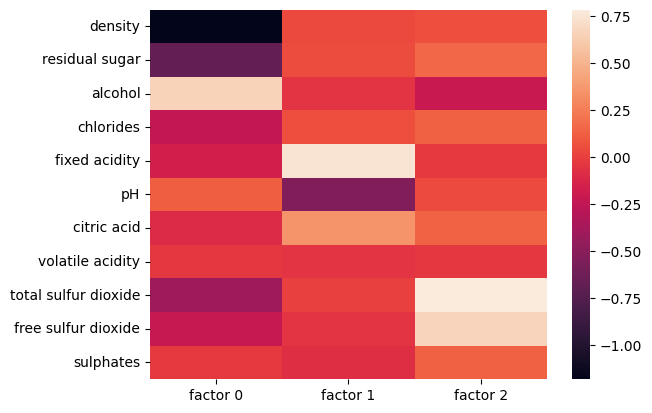

In [11]:
heatmap_w = res_w.get_loadings_frame(threshold=0.5).data
sns.heatmap(heatmap_w)

Using a diagram to plot each of the factors against each other to see if there is any correlation between the variables. Intrestingly, volatile acidity seems to have zero impact on the wine and is centrered around the middle of each of the diagram. Since all of the other values does not explicity show the same correlation as volatile acidity, none of them will be dropped besides volatile acidity.

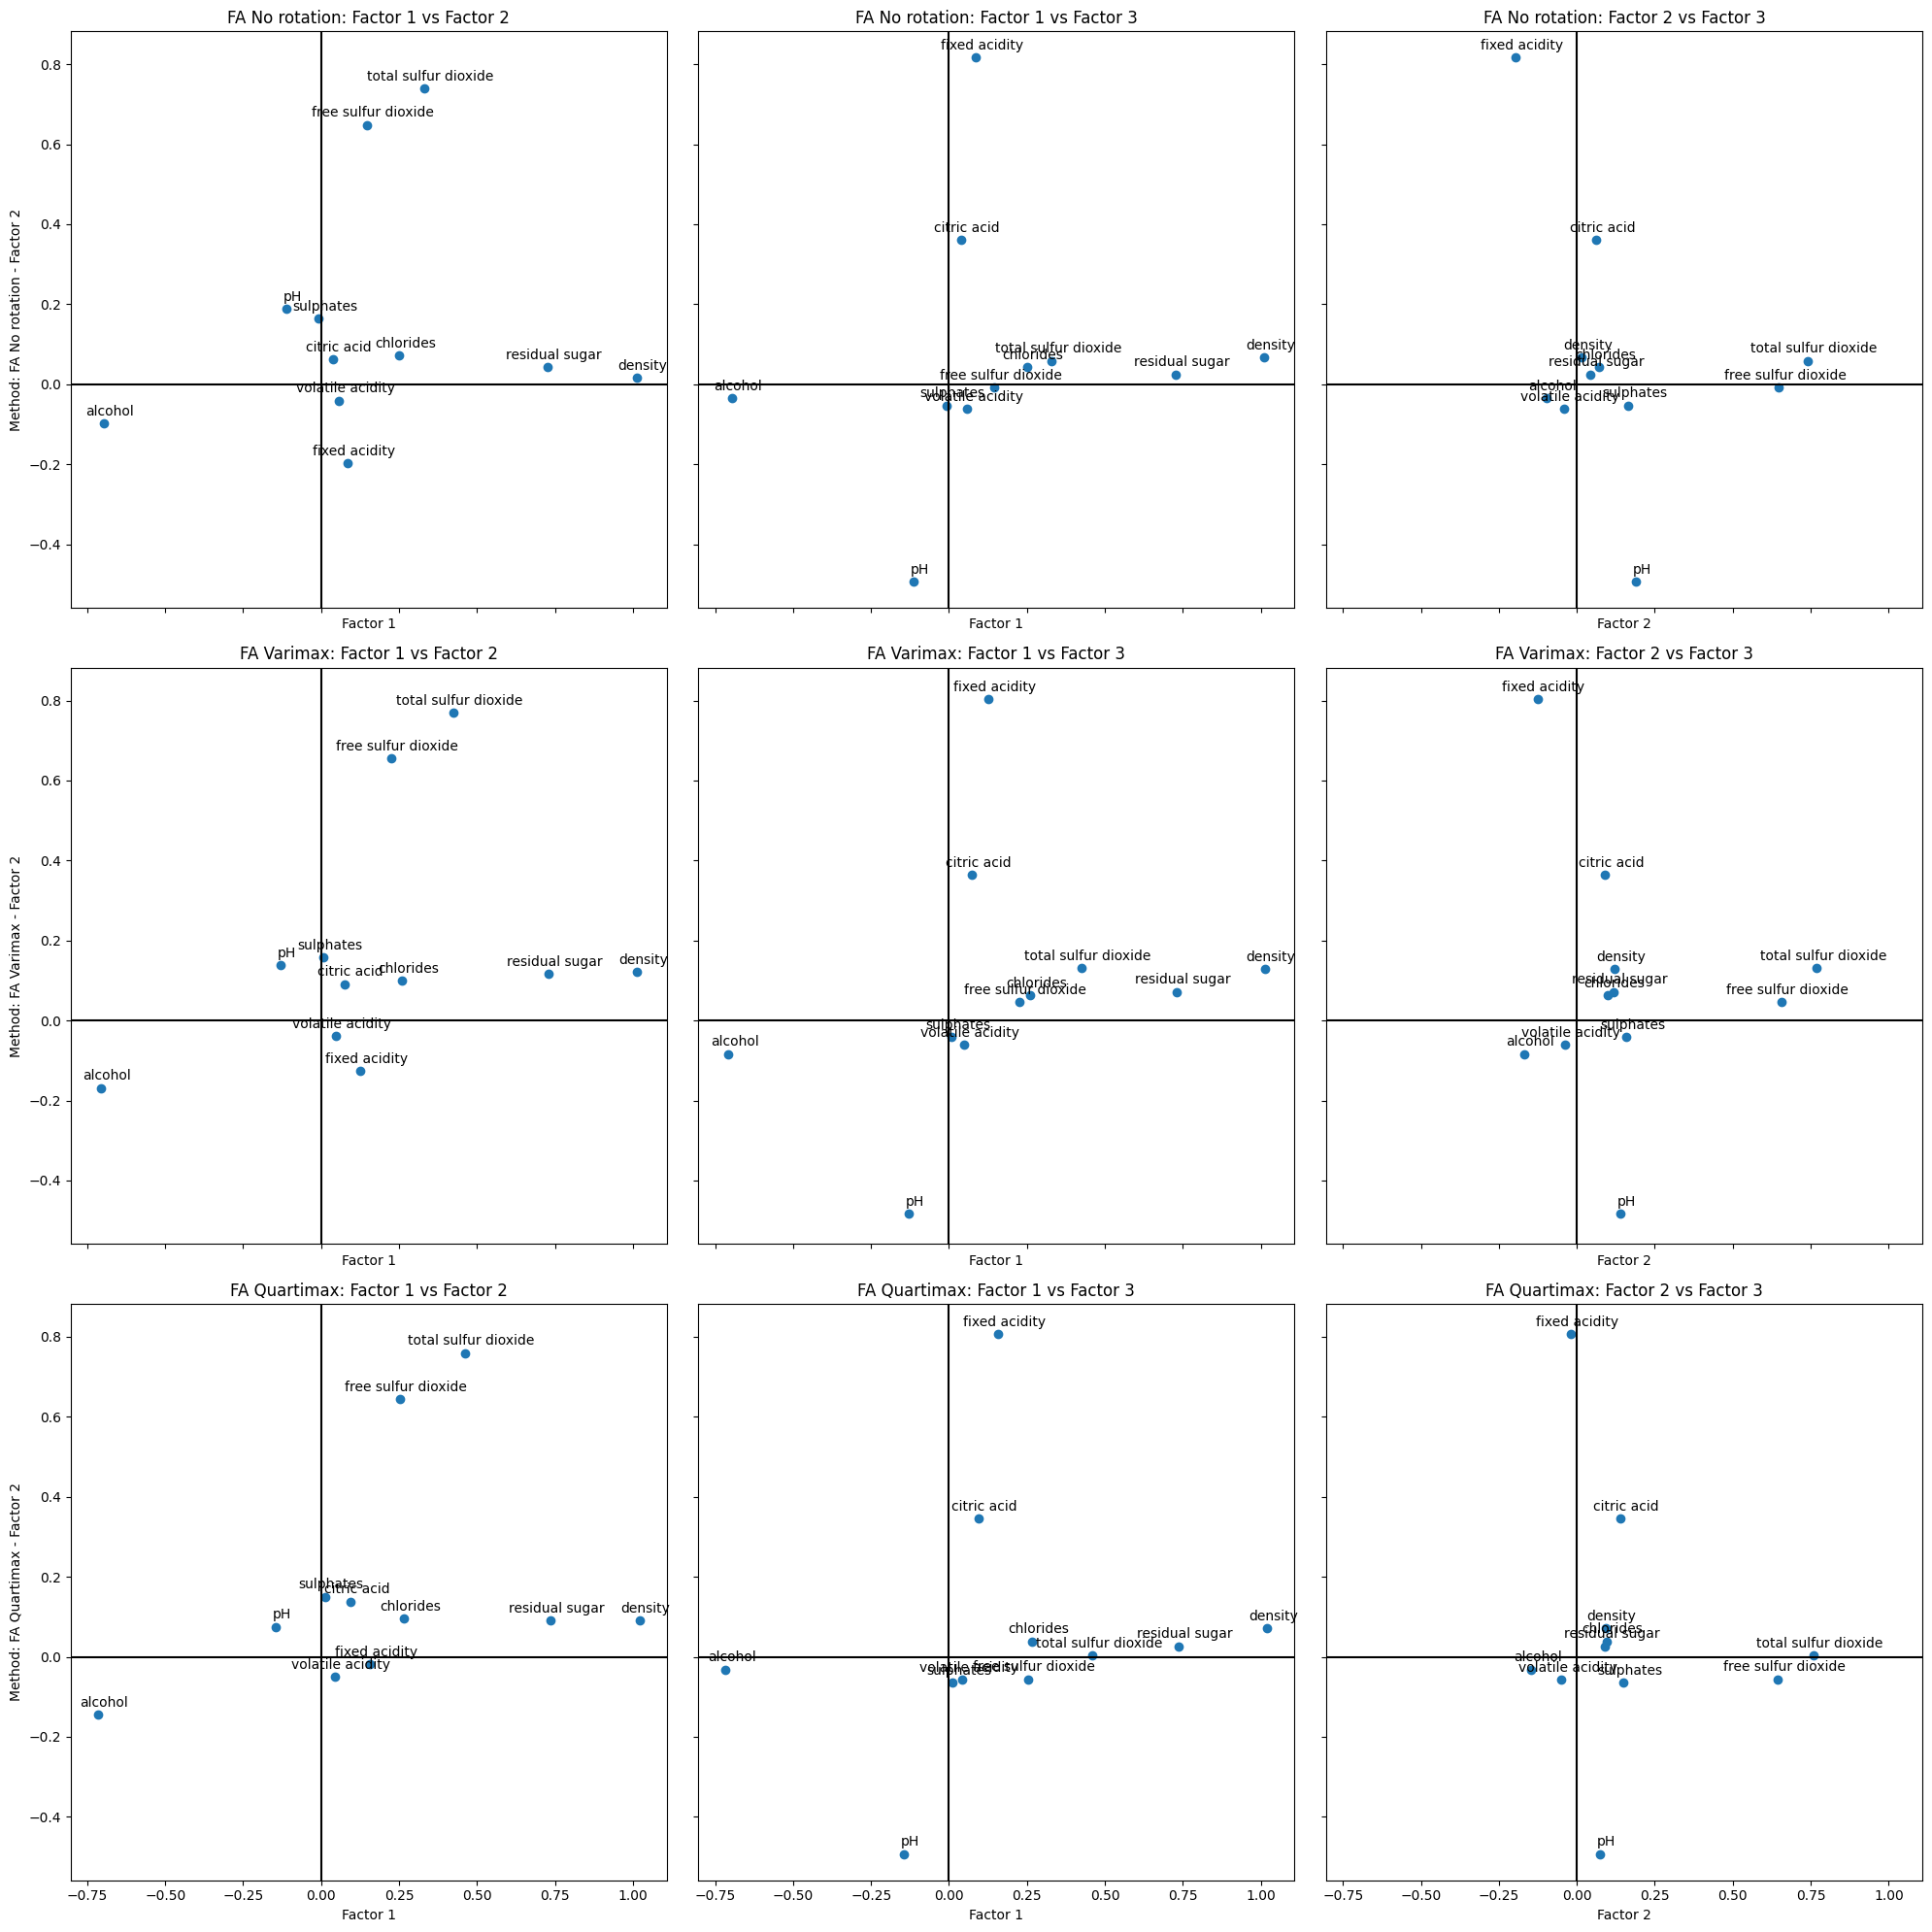

In [12]:
methods = [
    ("FA No rotation", FactorAnalyzer(3)),
    ("FA Varimax", FactorAnalyzer(3, rotation="varimax")),
    ("FA Quartimax", FactorAnalyzer(3, rotation="quartimax")),
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), sharex=True, sharey=True)

for row, (method_name, fa) in enumerate(methods):
    # Fit the FactorAnalyzer model
    fa.fit(data_white_dropped)

    # Get the factor loadings
    loadings = fa.loadings_

    # Plot Factor 1 vs Factor 2
    ax = axes[row, 0]
    ax.scatter(loadings[:, 0], loadings[:, 1])
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')
    ax.set_title(f"{method_name}: Factor 1 vs Factor 2")
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel(f"Method: {method_name} - Factor 2")
    ax.set_xlabel("Factor 1")
    for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
        ax.text(x + 0.02, y + 0.02, data_white.columns[i], ha="center")

    # Plot Factor 1 vs Factor 3
    ax = axes[row, 1]
    ax.scatter(loadings[:, 0], loadings[:, 2])
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')
    ax.set_title(f"{method_name}: Factor 1 vs Factor 3")
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel(f"Method: {method_name} - Factor 3")
    ax.set_xlabel("Factor 1")
    for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 2])):
        ax.text(x + 0.02, y + 0.02, data_white.columns[i], ha="center")

    # Plot Factor 2 vs Factor 3
    ax = axes[row, 2]
    ax.scatter(loadings[:, 1], loadings[:, 2])
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')
    ax.set_title(f"{method_name}: Factor 2 vs Factor 3")
    ax.set_xlabel("Factor 2")
    for i, (x, y) in enumerate(zip(loadings[:, 1], loadings[:, 2])):
        ax.text(x + 0.02, y + 0.02, data_white.columns[i], ha="center")
plt.tight_layout()

# Show the plot
plt.show()

Volatile acidity will be dropped due to the reason of having zero impact on the wine quality/taste, according to the scatter plot above. Volatile acidity is very close to zero when comparing two factors. While dropping volatile acidity one of the communality values will still be above one which indiciates a Heywood case. Density is the one having a communality value above one, which means it should be dropped as well.


What can be noticed in terms of the factors distribution that density, residual sugar, alcohol and chlorides are factored togheter which can describe the sweetness of the wine. Fixed acidity, pH and Citric acid describes the sourness of the wine. Lastly, total suflur dioxide, free sulfur dioxide and sulphates may represent the roughness of the wine.

In [13]:
data_white_dropped2 = data_white_dropped.drop(columns=['volatile acidity'])
mod_w2 = Factor(data_white_dropped2, 3)
res_w3 = mod_w2.fit()
res_w3.rotate('quartimax')
print(res_w3.communality)
res_w3.get_loadings_frame(threshold=0.4)

[0.56207899 0.13420032 0.47927136 0.07672974 0.42423692 0.8978535
 1.4368611  0.33076125 0.0242046  0.47352103]


,factor 0,factor 1,factor 2
density,-1.195444,-0.031127,-0.082500
residual sugar,-0.667355,-0.055811,-0.175482
alcohol,0.647147,0.051770,0.228126
chlorides,-0.232229,-0.059994,-0.138564
fixed acidity,-0.164386,-0.731353,0.013395
pH,0.117300,0.562160,-0.031281
citric acid,-0.096614,-0.331726,-0.121752
total sulfur dioxide,-0.381373,-0.008705,-0.867371
free sulfur dioxide,-0.213956,0.059542,-0.612303
sulphates,-0.022465,0.090914,-0.124236


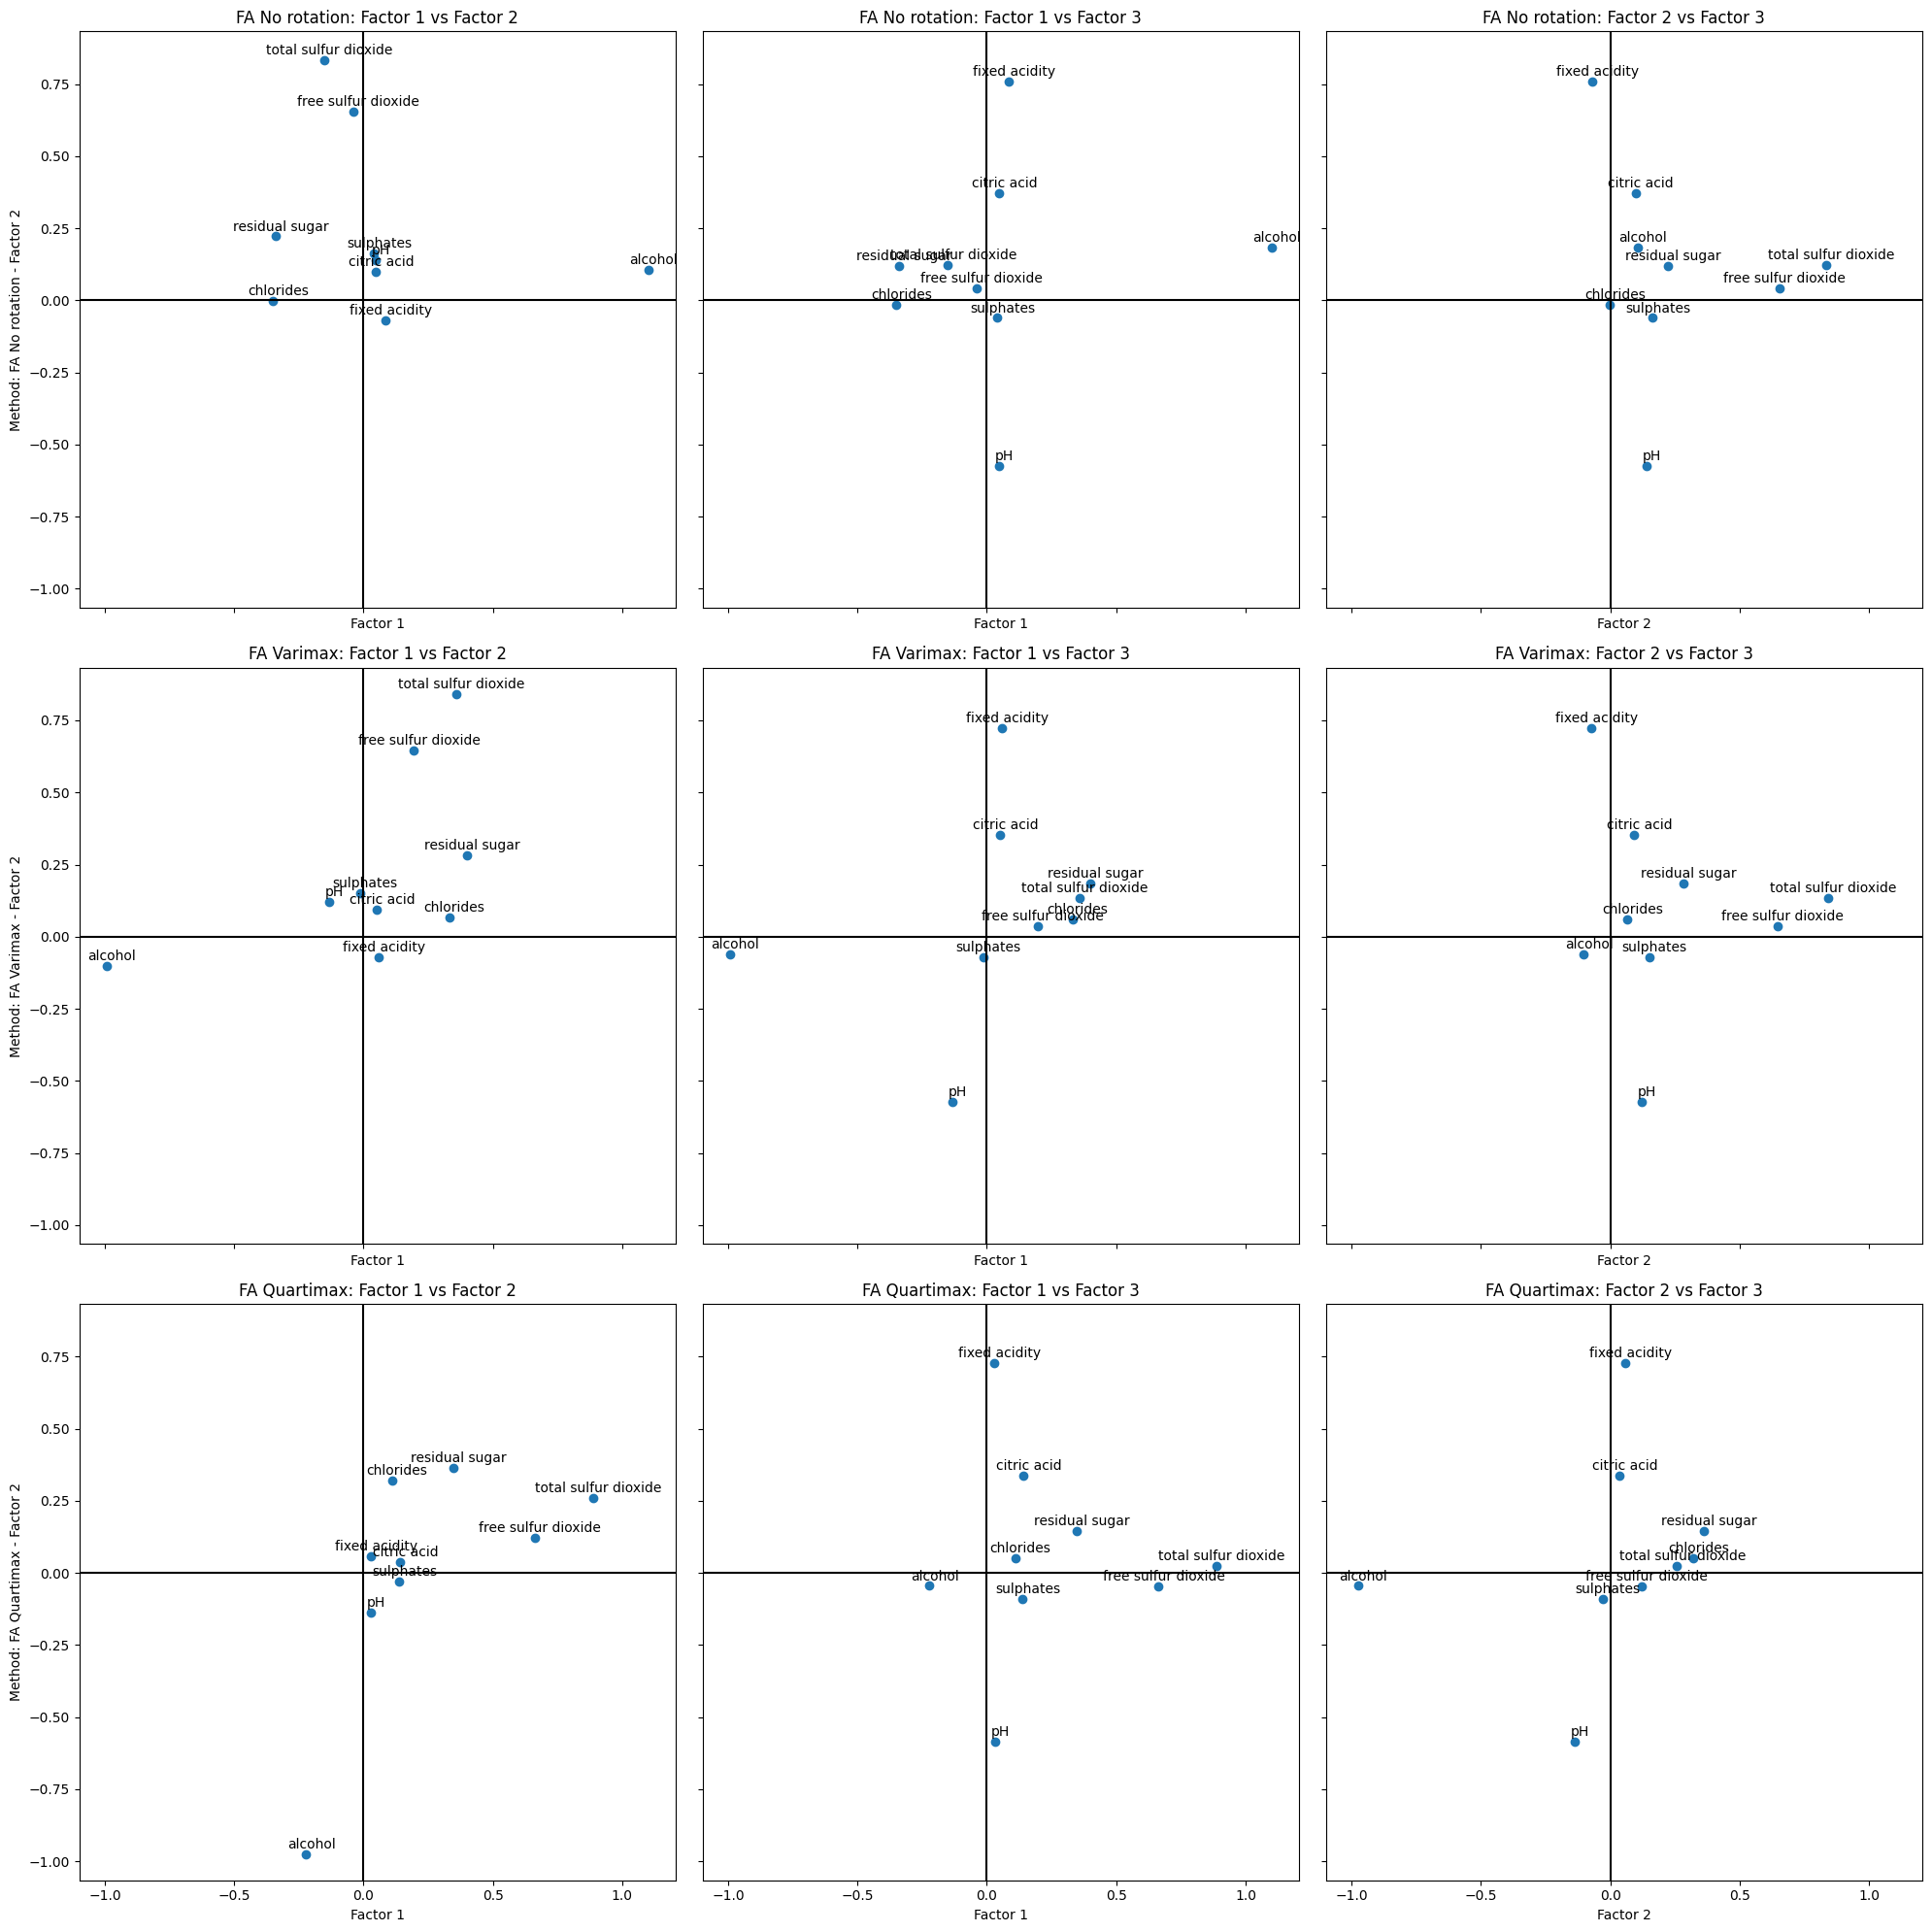

In [17]:
methods = [
    ("FA No rotation", FactorAnalyzer(3)),
    ("FA Varimax", FactorAnalyzer(3, rotation="varimax")),
    ("FA Quartimax", FactorAnalyzer(3, rotation="quartimax")),
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), sharex=True, sharey=True)

for row, (method_name, fa) in enumerate(methods):
    # Fit the FactorAnalyzer model
    fa.fit(data_white_dropped2)

    # Get the factor loadings
    loadings = fa.loadings_

    # Plot Factor 1 vs Factor 2
    ax = axes[row, 0]
    ax.scatter(loadings[:, 0], loadings[:, 1])
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')
    ax.set_title(f"{method_name}: Factor 1 vs Factor 2")
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel(f"Method: {method_name} - Factor 2")
    ax.set_xlabel("Factor 1")
    for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
        ax.text(x + 0.02, y + 0.02, data_white_dropped2.columns[i], ha="center")

    # Plot Factor 1 vs Factor 3
    ax = axes[row, 1]
    ax.scatter(loadings[:, 0], loadings[:, 2])
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')
    ax.set_title(f"{method_name}: Factor 1 vs Factor 3")
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel(f"Method: {method_name} - Factor 3")
    ax.set_xlabel("Factor 1")
    for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 2])):
        ax.text(x + 0.02, y + 0.02, data_white_dropped2.columns[i], ha="center")

    # Plot Factor 2 vs Factor 3
    ax = axes[row, 2]
    ax.scatter(loadings[:, 1], loadings[:, 2])
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')
    ax.set_title(f"{method_name}: Factor 2 vs Factor 3")
    ax.set_xlabel("Factor 2")
    for i, (x, y) in enumerate(zip(loadings[:, 1], loadings[:, 2])):
        ax.text(x + 0.02, y + 0.02, data_white_dropped2.columns[i], ha="center")
plt.tight_layout()

# Show the plot
plt.show()

Here we drop Density as well to see if there is better distribution of the factors and see if all the communality values will be below one. Instead one can see another communality value increasing and again we will have a Heywood case. Since the variables are based on each other, dropping variables will have no difference in the end result.

The threshold value indicates that sulphates, citric acid and residual sugar should be negecleted when considering the factors but not dropped since there data is still valuable to understand the overall quality.

Dropping density or volatile acidity, the threshold values still indicates that sulphates, citric acid and residual sugar should be negelected when factoring all of the variables, because it may or may not have an impact on the overall quality.

In [15]:
data_white_dropped2 = data_white_dropped.drop(columns=['volatile acidity', 'density'])
mod_w2 = Factor(data_white_dropped2, 3)
res_w3 = mod_w2.fit()
res_w3.rotate('quartimax')
print(res_w3.communality)
res_w3.get_loadings_frame(threshold=0.4)

[0.52867301 0.13512995 0.26923079 0.11265329 0.4588633  0.85203674
 0.36288338 0.02777226 1.07842742]


,factor 0,factor 1,factor 2
total sulfur dioxide,-0.882238,-0.024786,0.270330
free sulfur dioxide,-0.663216,0.047652,0.129374
sulphates,-0.136819,0.092147,-0.023701
fixed acidity,-0.025611,-0.724077,0.061075
pH,-0.028959,0.587440,-0.130225
citric acid,-0.140909,-0.337143,0.040119
alcohol,0.196840,0.039796,-1.018871
residual sugar,-0.344375,-0.147812,0.358871
chlorides,-0.107919,-0.051977,0.313536
